In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sport_database = pd.read_excel("Strikers_performance.xlsx")

In [3]:
sport_database.isnull().sum()

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(sport_database[['Movement off the Ball', 'Big Game Performance', 'Penalty Success Rate']])
sport_database[['Movement off the Ball', 'Big Game Performance', 'Penalty Success Rate']] = imputer.transform(sport_database[['Movement off the Ball', 'Big Game Performance', 'Penalty Success Rate']])

In [5]:
filtered_data = ['Goals Scored', 'Assists', 'Shots on Target', 'Movement off the Ball', 'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct']

In [6]:
sport_database[filtered_data] = sport_database[filtered_data].astype(int)

In [7]:
sport_database.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

In [8]:
round(sport_database.describe(),2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


In [9]:
freq_footedness = sport_database['Footedness'].value_counts()
freq_footedness

Footedness
Right-footed    267
Left-footed     233
Name: count, dtype: int64

In [10]:
perc_footedness = freq_footedness / len(sport_database['Footedness']) * 100
perc_footedness

Footedness
Right-footed    53.4
Left-footed     46.6
Name: count, dtype: float64

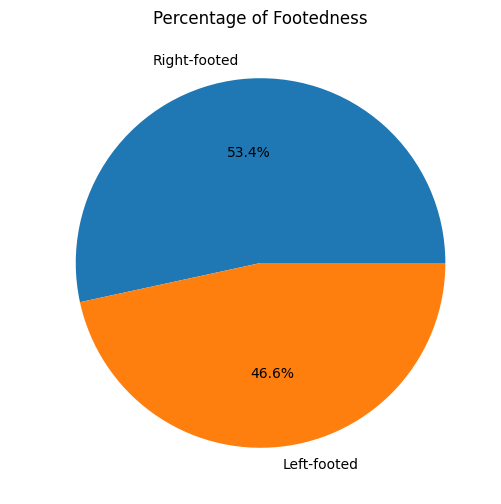

In [11]:
plt.figure(figsize = (10,6))
perc_footedness.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Percentage of Footedness')
plt.ylabel(' ')
plt.show()

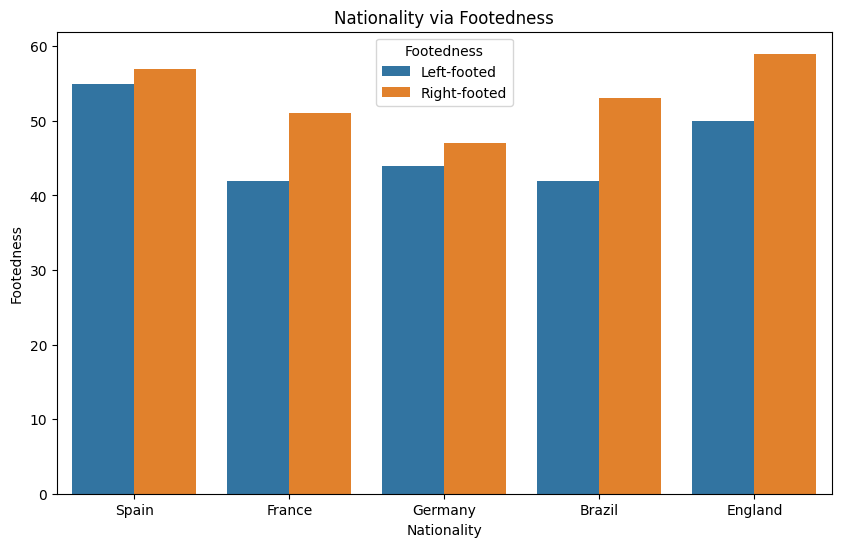

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Nationality', hue = 'Footedness', data = sport_database)
plt.title('Nationality via Footedness')
plt.xlabel('Nationality')
plt.ylabel('Footedness')
plt.show()

In [13]:
groupped_data = sport_database.groupby('Nationality')['Goals Scored'].mean()
groupped_data

Nationality
Brazil     15.315789
England    13.899083
France     14.408602
Germany    14.351648
Spain      14.687500
Name: Goals Scored, dtype: float64

In [14]:
groupped_data_2 = sport_database.groupby('Footedness')['Conversion Rate'].mean()
groupped_data_2

Footedness
Left-footed     0.198086
Right-footed    0.200592
Name: Conversion Rate, dtype: float64

In [15]:
from scipy import stats

In [16]:
Spain = sport_database.query('Nationality == "Spain"')['Consistency']
Germany = sport_database.query('Nationality == "Germany"')['Consistency']
France = sport_database.query('Nationality == "France"')['Consistency']
Brazil = sport_database.query('Nationality == "Brazil"')['Consistency']
England = sport_database.query('Nationality == "England"')['Consistency']

In [17]:
Test_stat,p_value = stats.f_oneway(Spain, Germany, France, Brazil, England)
print("P Value", p_value)

P Value 0.19278675901599154


In [18]:
alpha = 0.05
if p_value<alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


In [19]:
from scipy.stats import levene

In [20]:
stats, p_value = levene(Spain, Germany, France, Brazil, England)
print(p_value)

0.8083990350934653


In [21]:
alpha = 0.05
if p_value<alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


In [22]:
from scipy.stats import chi2_contingency

In [23]:
cross_tab = pd.crosstab(sport_database['Nationality'],sport_database['Consistency'])
chi2, p_value, dof, expected = chi2_contingency(cross_tab)
print(p_value)

0.4604888887434182


In [24]:
alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


In [25]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(sport_database['Nationality'], sport_database['Consistency'])
chi2, p_value, dof, expected = chi2_contingency(cross_tab)
print(p_value)

0.4604888887434182


In [26]:
alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


In [27]:
from scipy.stats import levene

In [28]:
stats, p_value = levene(Spain, Germany, France, Brazil, England)
print(p_value)
alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')
    

0.8083990350934653
Fail to reject null hypothesis


In [29]:
from scipy import stats
Test_stats, p_value = stats.f_oneway(Spain, Germany, France, Brazil, England)
print(p_value)

alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

0.19278675901599154
Fail to reject null hypothesis


In [30]:
from scipy.stats import levene
stats, p_value = levene(Spain, Germany, France, Brazil, England)
print(p_value)
alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')
    

0.8083990350934653
Fail to reject null hypothesis


In [31]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(sport_database['Nationality'], sport_database['Consistency'])
chi2, p_value, dof, expected = chi2_contingency(cross_tab)
print(p_value)
alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

0.4604888887434182
Fail to reject null hypothesis


In [32]:
from scipy import stats
Test_stats, p_value = stats.f_oneway(Spain, Germany, France, Brazil, England)
print(p_value)

0.19278675901599154


In [33]:
from scipy.stats import levene
stats, p_value = levene(Spain, Germany,Brazil, England, France)
print(p_value)

alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

0.8083990350934653
Fail to reject null hypothesis


In [34]:
from scipy import stats
Test_stat, p_value = stats.f_oneway(Spain, Germany,Brazil, England, France)
print(p_value)

alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

0.19278675901599154
Fail to reject null hypothesis


In [35]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(sport_database['Nationality'], sport_database['Consistency'])
chi2, p_value, dof, expected = chi2_contingency(cross_tab)
print(p_value)

alpha = 0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

0.4604888887434182
Fail to reject null hypothesis


In [54]:
dummies = pd.get_dummies(sport_database[['Footedness']])
sport_database = pd.concat([sport_database, dummies], axis = 1)

In [37]:
sport_database = sport_database.drop('Footedness_Right-footed',axis = 1)

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [66]:
x_reg = sport_database.drop(['Assists', 'Goals Scored'],axis = 1)
y_reg = sport_database['Goals Scored']
x_class = sport_database.drop(['Consistency','Marital Status'], axis=1)
y_class = sport_database['Marital Status']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [50]:
sport_database['Marital Status'] = encoder.fit_transform(sport_database['Marital Status'])

In [56]:
scaler = StandardScaler()
scaled_x_reg = scaler.fit_transform(x_reg)

In [111]:
x_reg_train, y_reg_train, x_reg_test, y_reg_test = train_test_split(scaled_x_reg, y_reg, test_size = 0.2, random_state = 42)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler_2 = MinMaxScaler()
scaled_x_class = scaler_2.fit_transform(x_class)

In [72]:
x_class_train, y_class_train, x_class_test, y_class_test = train_test_split(scaled_x_class, y_class, test_size = 0.2, random_state = 42)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
from sklearn.metrics import mean_squared_error

In [80]:
lr_model = LinearRegression()

In [112]:
lr_model.fit(x_reg_train, y_reg_train)

ValueError: Found input variables with inconsistent numbers of samples: [400, 100]